# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d100/f19fa5cac2210e7d290cc84087e1ed197341e3b851a9a7fa995df5af.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Dublin, Leinster, Ireland**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


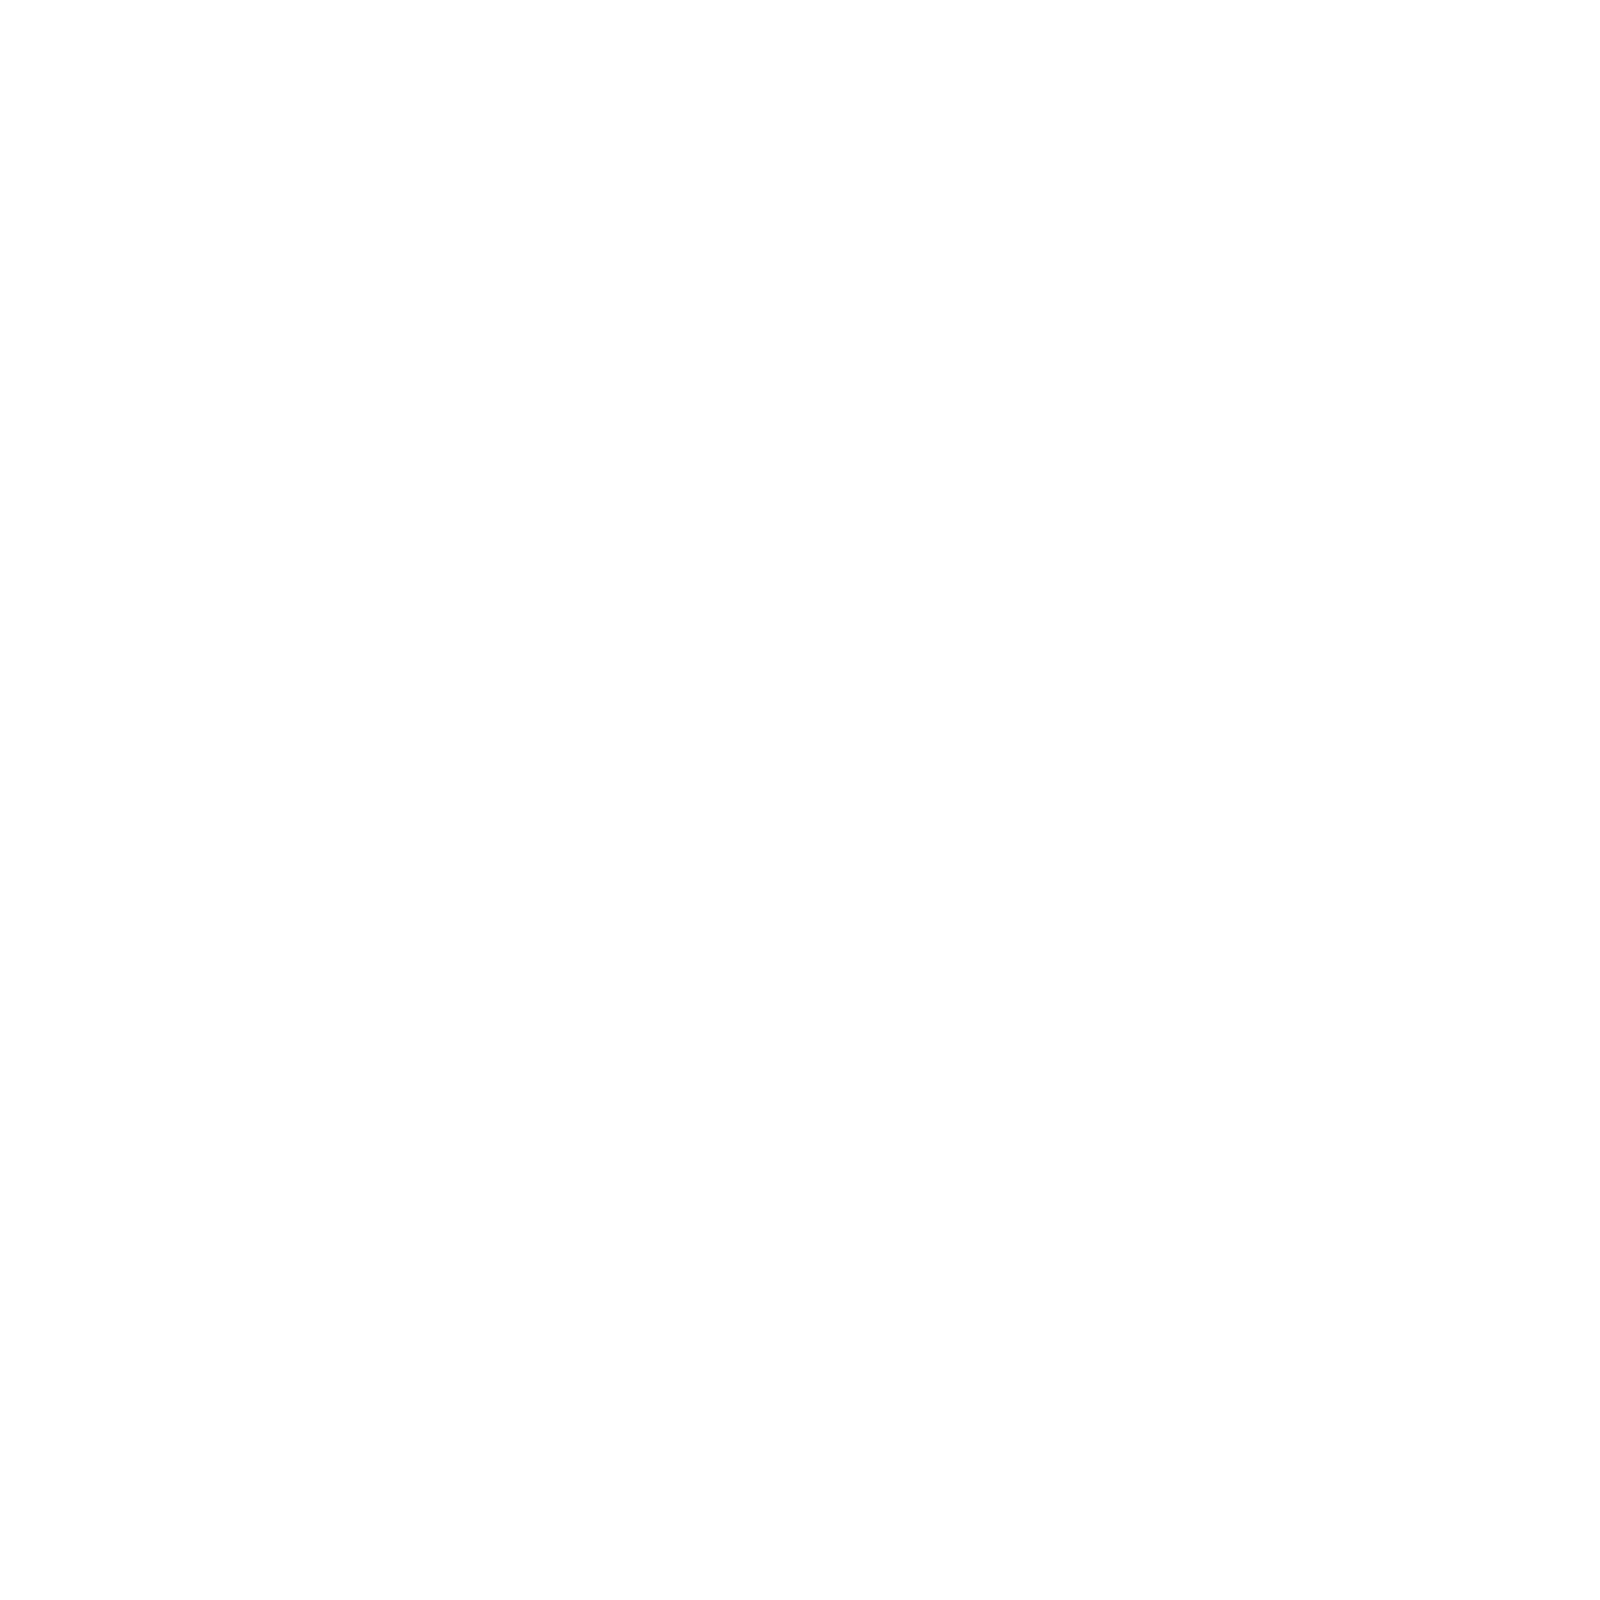

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib notebook

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(100,'f19fa5cac2210e7d290cc84087e1ed197341e3b851a9a7fa995df5af')

In [2]:
#reading the csv file
file = 'data/C2A2_data/BinnedCsvs_d100/f19fa5cac2210e7d290cc84087e1ed197341e3b851a9a7fa995df5af.csv'
data = pd.read_csv(file)

In [3]:
#sorting data
data.sort_values(['Date','ID'],inplace=True)


In [4]:
data.head()

,ID,Date,Element,Data_Value
28258,EI000003965,2005-01-01,TMAX,112
28740,EI000003965,2005-01-01,TMIN,48
19216,EI000003969,2005-01-01,TMIN,60
19419,EI000003969,2005-01-01,TMAX,120
29933,EIE00107762,2005-01-01,TMIN,70


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56105 entries, 28258 to 6212
Data columns (total 4 columns):
ID            56105 non-null object
Date          56105 non-null object
Element       56105 non-null object
Data_Value    56105 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56105 entries, 28258 to 6212
Data columns (total 4 columns):
ID            56105 non-null object
Date          56105 non-null datetime64[ns]
Element       56105 non-null object
Data_Value    56105 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.1+ MB


In [7]:
#after converting to_datetime, we can now extraxt year,month,day ...
#data['Date'].dt.year

In [8]:
#converting data from tenth of a degree C to C
data['Data_Value']=data['Data_Value'].apply(lambda x: float(x)/10)

In [9]:
data.head()

,ID,Date,Element,Data_Value
28258,EI000003965,2005-01-01,TMAX,11.2
28740,EI000003965,2005-01-01,TMIN,4.8
19216,EI000003969,2005-01-01,TMIN,6.0
19419,EI000003969,2005-01-01,TMAX,12.0
29933,EIE00107762,2005-01-01,TMIN,7.0


1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

In [10]:
#extracting month and day from the Date column
data['Month&Day'] = data['Date'].apply(lambda x: x.strftime('%m-%d'))  
data['Month&Day'].head()

28258    01-01
28740    01-01
19216    01-01
19419    01-01
29933    01-01
Name: Month&Day, dtype: object

In [11]:
data = data[data['Month&Day']!='02-29']

In [12]:
#year 2015 and records of that year
year_2015 = dt.datetime(2015,1,1).year
year15_records = data[data['Date'].dt.year==year_2015]
year15_records.head()

,ID,Date,Element,Data_Value,Month&Day
8141,EI000003969,2015-01-01,TMAX,14.1,01-01
7763,EIE00107762,2015-01-01,TMIN,9.8,01-01
7768,EIE00107762,2015-01-01,TMAX,14.0,01-01
7961,EIE00107808,2015-01-01,TMAX,13.9,01-01
7965,EIE00107808,2015-01-01,TMIN,8.1,01-01


In [13]:
#records 2005-2010
ten_year_records = data[data['Date'].dt.year!=year_2015]
ten_year_records.head(20)

,ID,Date,Element,Data_Value,Month&Day
28258,EI000003965,2005-01-01,TMAX,11.2,01-01
28740,EI000003965,2005-01-01,TMIN,4.8,01-01
19216,EI000003969,2005-01-01,TMIN,6.0,01-01
19419,EI000003969,2005-01-01,TMAX,12.0,01-01
29933,EIE00107762,2005-01-01,TMIN,7.0,01-01
30162,EIE00107762,2005-01-01,TMAX,10.9,01-01
2902,EIE00107808,2005-01-01,TMAX,10.2,01-01
3093,EIE00107808,2005-01-01,TMIN,4.1,01-01
2181,EIM00003957,2005-01-01,TMAX,11.8,01-01
31749,EIM00003967,2005-01-01,TMAX,11.7,01-01


In [14]:
#minimum/maximum of the ten year records
min_ten_year=(ten_year_records[ten_year_records['Element']=='TMIN']
              .groupby('Month&Day').aggregate({'Data_Value':np.min}))

max_ten_year=(ten_year_records[ten_year_records['Element']=='TMAX']
              .groupby('Month&Day').aggregate({'Data_Value':np.max}))

In [15]:
#minimum/maximum of 2015

year15_min=(year15_records[year15_records['Element']=='TMIN']
            .groupby('Month&Day')
            .aggregate({'Data_Value':np.min}))

year15_max=(year15_records[year15_records['Element']=='TMAX']
            .groupby('Month&Day')
            .aggregate({'Data_Value':np.max}))

In [16]:
broken_lowest = np.where(year15_min['Data_Value']<min_ten_year['Data_Value'])[0]
broken_highest = np.where(year15_max['Data_Value']>max_ten_year['Data_Value'])[0]

In [17]:
broken_lowest

array([ 18, 102, 285])

<IPython.core.display.Javascript object>


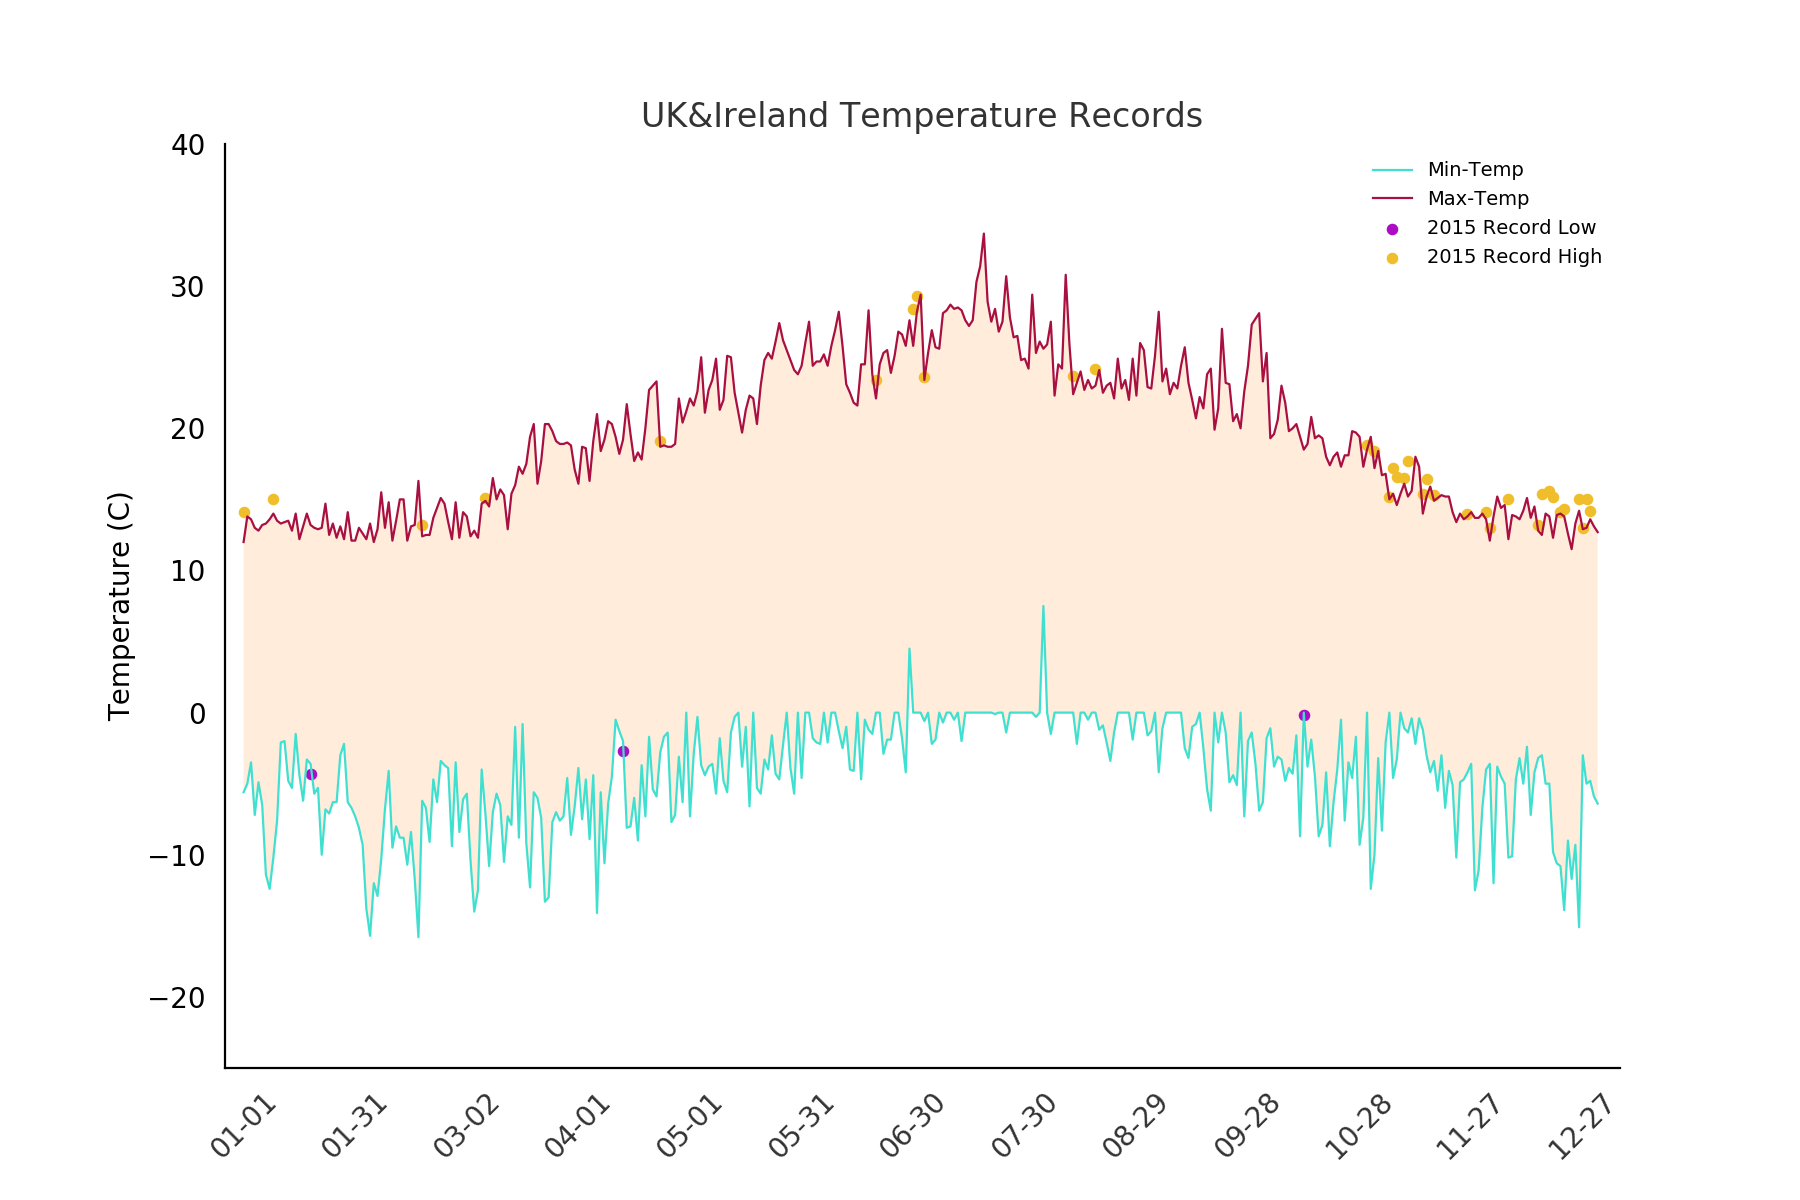

In [18]:
plt.figure(figsize=(9,6))
plt.plot(min_ten_year.values,'#40e0d0',label='Min-Temp',linewidth=.8)
plt.plot(max_ten_year.values,'#a90f40',label='Max-Temp',linewidth=.8)
plt.xticks(range(0, len(min_ten_year), 30),
           min_ten_year.index[range(0, len(min_ten_year), 30)],
           rotation = '45',alpha=0.8)
plt.gca().axis([-5, 370, -25, 40])

plt.title('UK&Ireland Temperature Records', alpha=0.8)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.ylabel('Temperature (C)')


In [19]:
plt.gca().fill_between(range(len(min_ten_year)), min_ten_year['Data_Value'], max_ten_year['Data_Value'], facecolor = '#FFDAB9',alpha=0.5)



In [20]:
#adding scatter of broken lowest/highest
plt.scatter(broken_lowest, year15_min.iloc[broken_lowest], s = 10, c = '#ab0cc4', label = '2015 Record Low')



In [21]:
plt.scatter(broken_highest, year15_max.iloc[broken_highest], s = 10, c = '#f1be2b', label = '2015 Record High')


In [22]:
#show legend
plt.legend(frameon=False,fontsize=7)

In [23]:
#removing borders
plt.gca().spines['right'].set_visible(False)

In [24]:
plt.gca().spines['top'].set_visible(False)

In [25]:
plt.savefig('Temp_records1.png')